## Análisis de Estructura y Calidad




In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno

# Set random seed for reproducibility
np.random.seed(42)

df = pd.read_csv('Titanic-Dataset.csv')

# Display basic information about the dataset
print("Informacion general del dataset:")
display(df.info())
print("\nPrimeras 5 filas del dataset:")
display(df.head())



Informacion general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


Primeras 5 filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



--- Clase 1 ---
  Edad_categoria  Total  Sobrevivientes  No_Sobrevivieron
0           Bebé      2               1                 1
1           Niño      2               2                 0
2    Adolescente      8               8                 0
3          Joven     30              22                 8
4         Adulto    127              84                43
5   Adulto mayor     17               5                12

--- Clase 2 ---
  Edad_categoria  Total  Sobrevivientes  No_Sobrevivieron
0           Bebé      7               7                 0
1           Niño     10              10                 0
2    Adolescente      6               4                 2
3          Joven     42              17                25
4         Adulto    104              44                60
5   Adulto mayor      4               1                 3

--- Clase 3 ---
  Edad_categoria  Total  Sobrevivientes  No_Sobrevivieron
0           Bebé     15               7                 8
1           Niño     

/tmp/ipython-input-1188253664.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Total')
/tmp/ipython-input-1188253664.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivientes = df[df['Survived']==1].groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Sobrevivientes')


## Estadística Descriptiva

In [ ]:
df_clean = df.copy()

# Crear nueva columna con los códigos
df['Sex_code'] = df['Sex'].replace({
    'female': '1',
    'male': '0'
})

# Guardar en un nuevo archivo CSV
df.to_csv('Titanic-Dataset-nuevo.csv', index=False)

print("CSV modificado guardado como 'Titanic-Dataset-nuevo.csv'")

CSV modificado guardado como 'Titanic-Dataset-nuevo.csv'


In [ ]:

data = pd.read_csv('Titanic-Dataset-nuevo.csv')

print("\nPrimeras 5 filas del dataset:")
display(data.head())

# Basic statistical summary
#print("\nEstadisticas descriptivas de las variables numericas:")
#display(df_clean[numerical_columns].describe())

# Compute correlation matrix
#correlation_matrix = df_clean[numerical_columns].corr()


Primeras 5 filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Variables numéricas
numerical_columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Calcular medidas
medidas = pd.DataFrame({
    'Media': data[numerical_columns].mean(),
    'Mediana': data[numerical_columns].median(),
    'Moda': data[numerical_columns].mode().iloc[0],
    'Mínimo': data[numerical_columns].min(),
    'Máximo': data[numerical_columns].max(),
    'Varianza': data[numerical_columns].var(),
    'DesvEstándar': data[numerical_columns].std()
})

print(medidas)

            Media  Mediana   Moda  Mínimo    Máximo     Varianza  DesvEstándar
Age     29.699118  28.0000  24.00    0.42   80.0000   211.019125     14.526497
Fare    32.204208  14.4542   8.05    0.00  512.3292  2469.436846     49.693429
Pclass   2.308642   3.0000   3.00    1.00    3.0000     0.699015      0.836071
SibSp    0.523008   0.0000   0.00    0.00    8.0000     1.216043      1.102743
Parch    0.381594   0.0000   0.00    0.00    6.0000     0.649728      0.806057


In [ ]:

# Seleccionar solo columnas categóricas
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols += ['Pclass', 'Survived', 'Sex_code']  # Agregar categóricas que vienen como números

# Eliminar duplicados en la lista (por si acaso)
cat_cols = list(set(cat_cols))

# Crear tablas de frecuencia
frecuencias = {}
for col in cat_cols:
    tabla = pd.DataFrame({
        'Frecuencia': data[col].value_counts(dropna=False),
        'Porcentaje': round(data[col].value_counts(normalize=True, dropna=False) * 100, 2)
    })
    frecuencias[col] = tabla

# Mostrar tablas
for col, tabla in frecuencias.items():
    print(f"\n--- Frecuencia de {col} ---")
    print(tabla)


--- Frecuencia de Survived ---
          Frecuencia  Porcentaje
Survived                        
0                549       61.62
1                342       38.38

--- Frecuencia de Embarked ---
          Frecuencia  Porcentaje
Embarked                        
S                644       72.28
C                168       18.86
Q                 77        8.64
NaN                2        0.22

--- Frecuencia de Sex_code ---
          Frecuencia  Porcentaje
Sex_code                        
0                577       64.76
1                314       35.24

--- Frecuencia de Pclass ---
        Frecuencia  Porcentaje
Pclass                        
3              491       55.11
1              216       24.24
2              184       20.65

--- Frecuencia de Name ---
                                                    Frecuencia  Porcentaje
Name                                                                      
Dooley, Mr. Patrick                                          1        0.11
Brau

In [ ]:

# Categorizar edades
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df['Edad_categoria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Contar pasajeros totales por clase y categoría de edad
conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Total')

# Contar sobrevivientes por clase y categoría de edad
sobrevivientes = df[df['Survived']==1].groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Sobrevivientes')

# Combinar tablas
tabla = pd.merge(conteo_total, sobrevivientes, on=['Pclass', 'Edad_categoria'], how='left')
tabla['Sobrevivientes'] = tabla['Sobrevivientes'].fillna(0).astype(int)

# Calcular diferencia
tabla['No_Sobrevivieron'] = tabla['Total'] - tabla['Sobrevivientes']

# Crear tablas separadas por clase
for clase in sorted(tabla['Pclass'].unique()):
    print(f"\n--- Clase {clase} ---")
    tabla_clase = tabla[tabla['Pclass']==clase].reset_index(drop=True)
    print(tabla_clase[['Edad_categoria', 'Total', 'Sobrevivientes', 'No_Sobrevivieron']])


--- Clase 1 ---
  Edad_categoria  Total  Sobrevivientes  No_Sobrevivieron
0           Bebé      2               1                 1
1           Niño      2               2                 0
2    Adolescente      8               8                 0
3          Joven     30              22                 8
4         Adulto    127              84                43
5   Adulto mayor     17               5                12

--- Clase 2 ---
  Edad_categoria  Total  Sobrevivientes  No_Sobrevivieron
0           Bebé      7               7                 0
1           Niño     10              10                 0
2    Adolescente      6               4                 2
3          Joven     42              17                25
4         Adulto    104              44                60
5   Adulto mayor      4               1                 3

--- Clase 3 ---
  Edad_categoria  Total  Sobrevivientes  No_Sobrevivieron
0           Bebé     15               7                 8
1           Niño     

/tmp/ipython-input-593158007.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Total')
/tmp/ipython-input-593158007.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivientes = df[df['Survived']==1].groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Sobrevivientes')


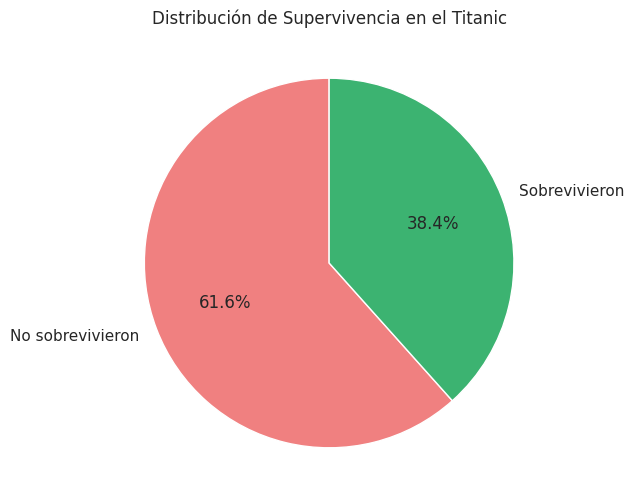

In [ ]:

# Conteo de sobrevivientes y no sobrevivientes
survived_counts = data['Survived'].value_counts()

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(
    survived_counts,
    labels=["No sobrevivieron", "Sobrevivieron"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["lightcoral", "mediumseagreen"]
)
plt.title("Distribución de Supervivencia en el Titanic")
plt.show()

/tmp/ipython-input-708333895.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje.index, y=porcentaje.values, palette=['skyblue', 'pink'])


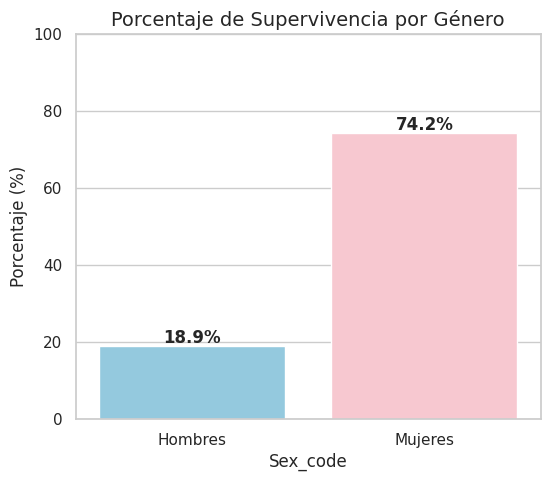

In [ ]:
# Calcular porcentaje de supervivencia por género
porcentaje = (
    data.groupby('Sex_code')['Survived']
    .mean() * 100
)

# Mapeo de códigos a texto
porcentaje.index = porcentaje.index.map({0: 'Hombres', 1: 'Mujeres'})

# Crear gráfica
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=porcentaje.index, y=porcentaje.values, palette=['skyblue', 'pink'])

# Añadir etiquetas de porcentaje encima de cada barra
for i, val in enumerate(porcentaje.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Género', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

plt.show()

/tmp/ipython-input-3210465128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_pclass.index, y=porcentaje_pclass.values, palette='coolwarm')


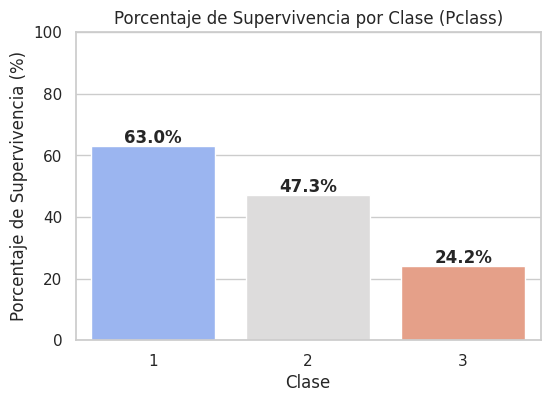

In [ ]:

# Calcular porcentaje de supervivencia por Pclass
porcentaje_pclass = (data.groupby('Pclass')['Survived'].mean() * 100).sort_index()

# Crear gráfica
plt.figure(figsize=(6,4))
ax = sns.barplot(x=porcentaje_pclass.index, y=porcentaje_pclass.values, palette='coolwarm')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_pclass.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Clase (Pclass)')
plt.xlabel('Clase')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()

/tmp/ipython-input-1142235134.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  porcentaje_grupo = data.groupby("GrupoEdad")["Survived"].mean() * 100
/tmp/ipython-input-1142235134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_grupo.index, y=porcentaje_grupo.values, palette="Spectral")


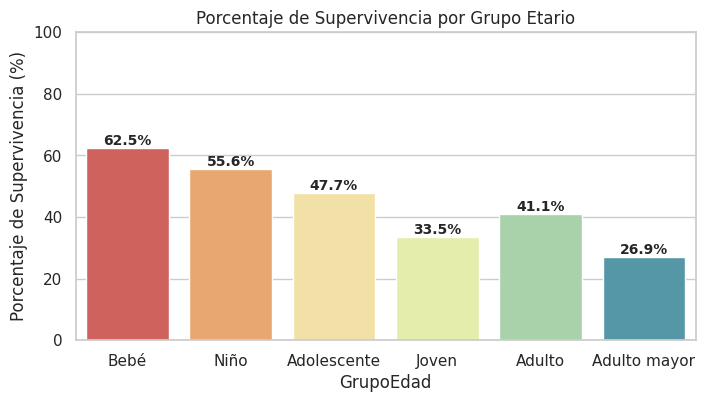

In [ ]:

# Crear grupos etarios
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
data["GrupoEdad"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Calcular porcentaje de supervivencia por grupo etario
porcentaje_grupo = data.groupby("GrupoEdad")["Survived"].mean() * 100

# Crear gráfica
plt.figure(figsize=(8,4))
ax = sns.barplot(x=porcentaje_grupo.index, y=porcentaje_grupo.values, palette="Spectral")

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_grupo.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.title("Porcentaje de Supervivencia por Grupo Etario")
plt.ylabel("Porcentaje de Supervivencia (%)")
plt.ylim(0, 100)
plt.show()

## Visualización Univariada

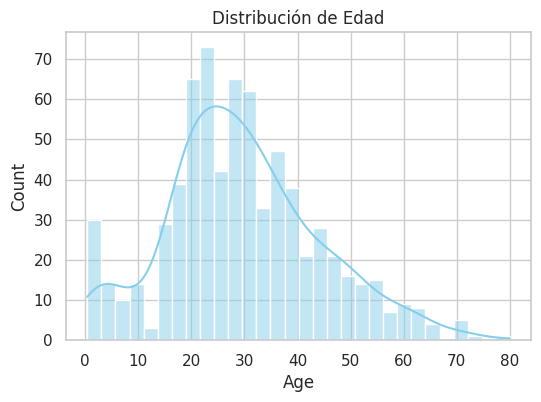

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Distribución de Edad")
plt.show()

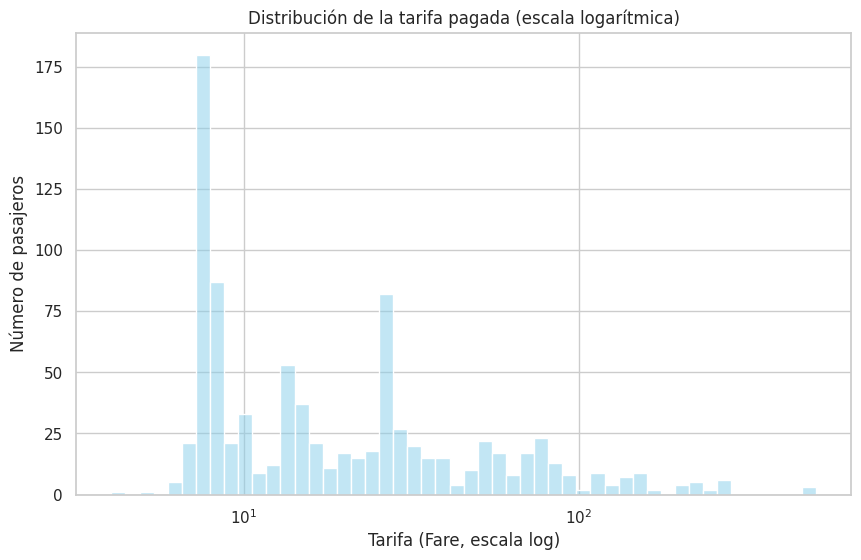

In [ ]:
# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Graficar distribución de la tarifa pagada con escala logarítmica
sns.histplot(df['Fare'], bins=50, kde=True, color="skyblue", log_scale=True)

plt.title("Distribución de la tarifa pagada (escala logarítmica)")
plt.xlabel("Tarifa (Fare, escala log)")
plt.ylabel("Número de pasajeros")
plt.show()

/tmp/ipython-input-2303440311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette="viridis")


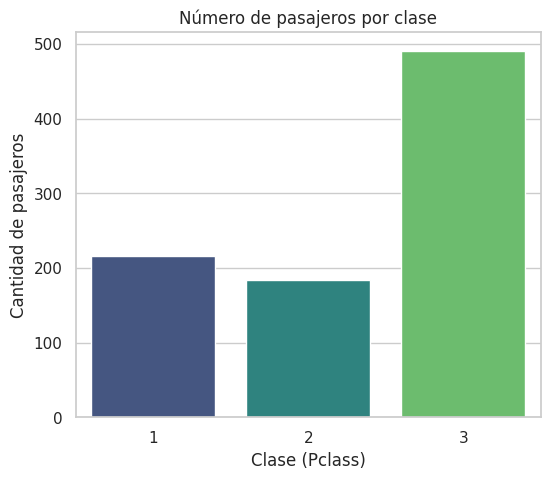

In [ ]:
# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

# Graficar conteo por clase
sns.countplot(x='Pclass', data=df, palette="viridis")

plt.title("Número de pasajeros por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Cantidad de pasajeros")
plt.show()


/tmp/ipython-input-241183601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sex", palette="Set2")


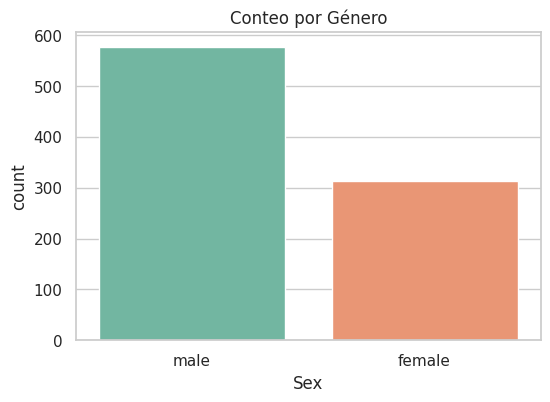

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", palette="Set2")
plt.title("Conteo por Género")
plt.show()

/tmp/ipython-input-4014508517.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=conteo_edad, palette="viridis")


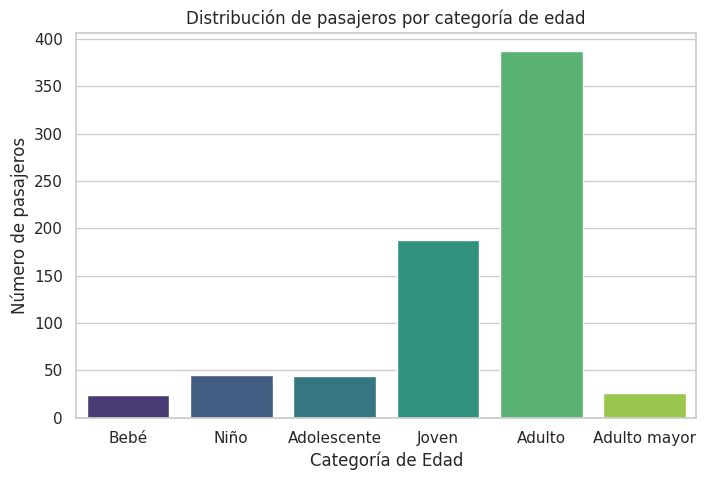

In [ ]:
# Categorizar edades
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df['Edad_categoria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Contar pasajeros por categoría de edad
conteo_edad = df['Edad_categoria'].value_counts().sort_index().reset_index()
conteo_edad.columns = ['Edad_categoria', 'Count']

# Configuración de seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Gráfico de barras
sns.barplot(x='Edad_categoria', y='Count', data=conteo_edad, palette="viridis")

plt.title("Distribución de pasajeros por categoría de edad")
plt.xlabel("Categoría de Edad")
plt.ylabel("Número de pasajeros")
plt.show()


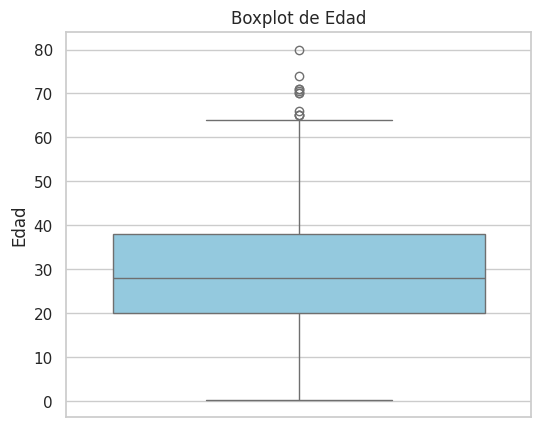

In [ ]:
#Boxplot de edad
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Age'], color="skyblue")
plt.title("Boxplot de Edad")
plt.ylabel("Edad")
plt.show()


/tmp/ipython-input-3579072581.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Embarked", palette="muted")


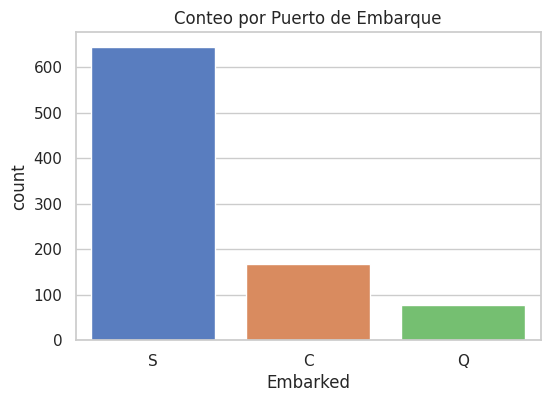

/tmp/ipython-input-3579072581.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="Fare", palette="coolwarm")


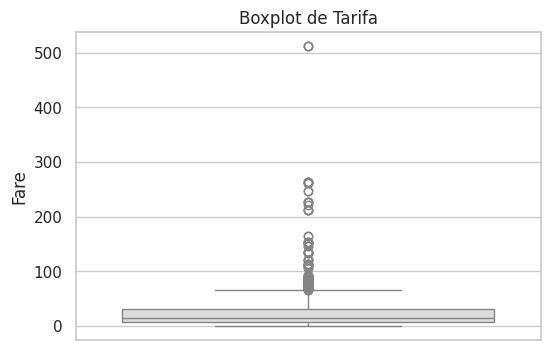

In [ ]:
# =========================
# 1.3 Visualizaciones univariadas
# =========================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Embarked", palette="muted")
plt.title("Conteo por Puerto de Embarque")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, y="Fare", palette="coolwarm")
plt.title("Boxplot de Tarifa")
plt.show()


## Análisis Bivariado y Multivariado


/tmp/ipython-input-459567252.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Compañía', y='Count', data=conteo_compania, palette="Set2")


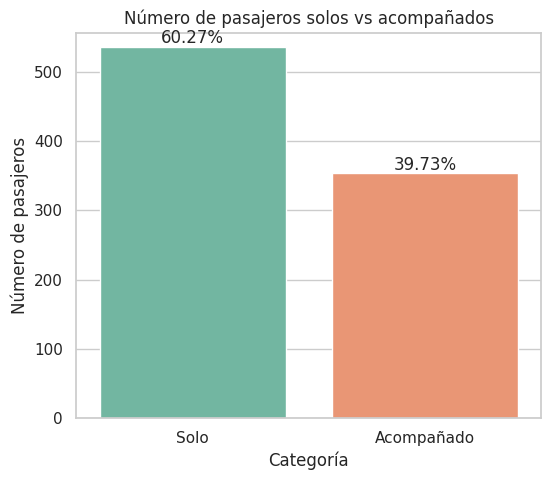

In [ ]:
# Clasificar si el pasajero estaba solo o acompañado
df['Compañía'] = df.apply(lambda row: 'Solo' if row['SibSp'] == 0 and row['Parch'] == 0 else 'Acompañado', axis=1)

# Contar pasajeros por categoría
conteo_compania = df['Compañía'].value_counts().reset_index()
conteo_compania.columns = ['Compañía', 'Count']

# Calcular porcentaje
total = conteo_compania['Count'].sum()
conteo_compania['Porcentaje'] = (conteo_compania['Count'] / total * 100).round(2)

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

# Gráfico de barras
ax = sns.barplot(x='Compañía', y='Count', data=conteo_compania, palette="Set2")

# Agregar porcentaje sobre las barras
for index, row in conteo_compania.iterrows():
    ax.text(index, row['Count'] + 5, f"{row['Porcentaje']}%", ha='center', fontsize=12)

plt.title("Número de pasajeros solos vs acompañados")
plt.xlabel("Categoría")
plt.ylabel("Número de pasajeros")
plt.ylim(0, conteo_compania['Count'].max() + 20)
plt.show()


   Pclass     Sex  Count
0       1  female     94
1       1    male    122
2       2  female     76
3       2    male    108
4       3  female    144
5       3    male    347


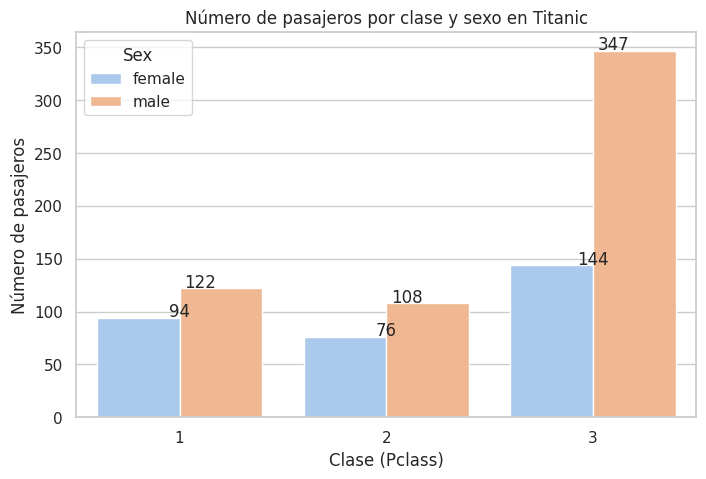

In [ ]:
# Agrupar por clase y sexo, y contar pasajeros
conteo_por_clase_sexo = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

# Mostrar la tabla
print(conteo_por_clase_sexo)

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Gráfico de barras agrupadas
sns.barplot(x='Pclass', y='Count', hue='Sex', data=conteo_por_clase_sexo, palette="pastel")

# Etiquetas y título
plt.ylabel("Número de pasajeros")
plt.xlabel("Clase (Pclass)")
plt.title("Número de pasajeros por clase y sexo en Titanic")

# Mostrar valores encima de las barras
for i in range(len(conteo_por_clase_sexo)):
    plt.text(x=i//2 + 0.1*(i%2), y=conteo_por_clase_sexo['Count'][i] + 1,
             s=conteo_por_clase_sexo['Count'][i], ha='center')

plt.show()

/tmp/ipython-input-1322890300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=sobrevivientes_pct, palette="viridis")


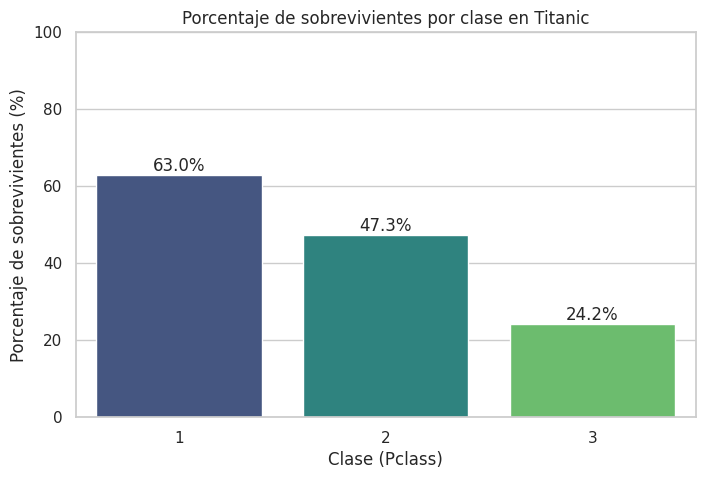

In [ ]:
# Calcular porcentaje de sobrevivientes por clase
sobrevivientes_pct = df.groupby('Pclass')['Survived'].mean() * 100
sobrevivientes_pct = sobrevivientes_pct.reset_index()  # convertir a DataFrame para seaborn

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Gráfico de barras
sns.barplot(x='Pclass', y='Survived', data=sobrevivientes_pct, palette="viridis")

# Etiquetas y título
plt.ylabel("Porcentaje de sobrevivientes (%)")
plt.xlabel("Clase (Pclass)")
plt.title("Porcentaje de sobrevivientes por clase en Titanic")

# Mostrar porcentaje en cada barra
for index, row in sobrevivientes_pct.iterrows():
    plt.text(row.name, row.Survived + 1, f"{row.Survived:.1f}%", ha='center')

plt.ylim(0, 100)  # límite del eje y en porcentaje
plt.show()

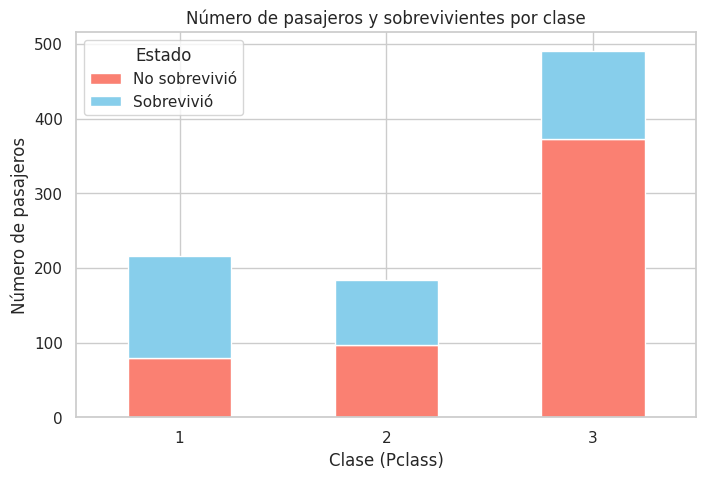

In [ ]:
# Agrupar por clase y supervivencia
conteo = data.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

# Pivotear para tener columnas de sobrevivientes y no sobrevivientes
conteo_pivot = conteo.pivot(index='Pclass', columns='Survived', values='count').fillna(0)

# Renombrar columnas
conteo_pivot.columns = ['No sobrevivió', 'Sobrevivió']

# Gráfico de barras apiladas
conteo_pivot.plot(kind='bar', stacked=True, figsize=(8,5), color=['salmon', 'skyblue'])

plt.title('Número de pasajeros y sobrevivientes por clase')
plt.xlabel('Clase (Pclass)')
plt.ylabel('Número de pasajeros')
plt.legend(title='Estado')
plt.xticks(rotation=0)
plt.show()

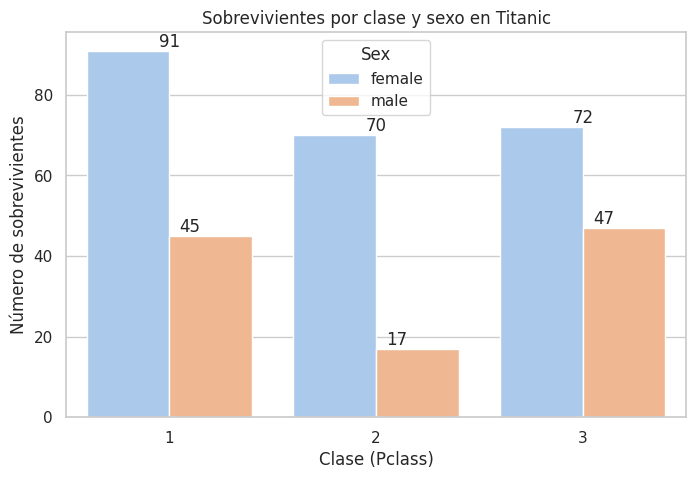

In [ ]:
# Agrupar por clase y sexo, y contar sobrevivientes
sobrevivientes = df[df['Survived'] == 1].groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Gráfico de barras agrupadas
sns.barplot(x='Pclass', y='Count', hue='Sex', data=sobrevivientes, palette="pastel")

# Etiquetas y título
plt.ylabel("Número de sobrevivientes")
plt.xlabel("Clase (Pclass)")
plt.title("Sobrevivientes por clase y sexo en Titanic")

# Mostrar valores encima de las barras
for i in range(len(sobrevivientes)):
    plt.text(x=i//2 + 0.1*(i%2), y=sobrevivientes['Count'][i] + 1, s=sobrevivientes['Count'][i], ha='center')

plt.show()


/tmp/ipython-input-985665393.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=sobrevivientes[sobrevivientes['Sex']=='male'], palette="Blues")
/tmp/ipython-input-985665393.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=sobrevivientes[sobrevivientes['Sex']=='female'], palette="Reds")


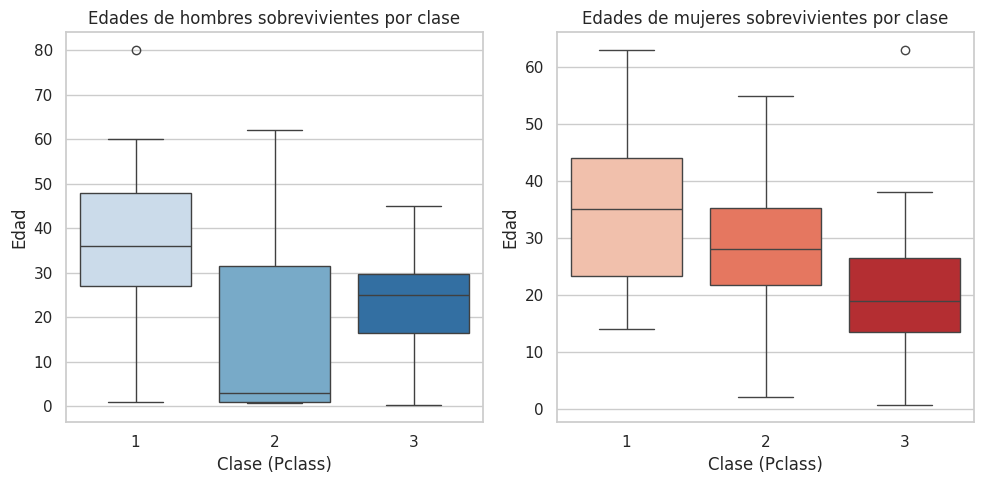

In [ ]:
# Filtrar solo sobrevivientes
sobrevivientes = df[df['Survived'] == 1]

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

# Gráfico de edades de hombres sobrevivientes por clase
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=sobrevivientes[sobrevivientes['Sex']=='male'], palette="Blues")
plt.title("Edades de hombres sobrevivientes por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Edad")

# Gráfico de edades de mujeres sobrevivientes por clase
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Age', data=sobrevivientes[sobrevivientes['Sex']=='female'], palette="Reds")
plt.title("Edades de mujeres sobrevivientes por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Edad")

plt.tight_layout()
plt.show()

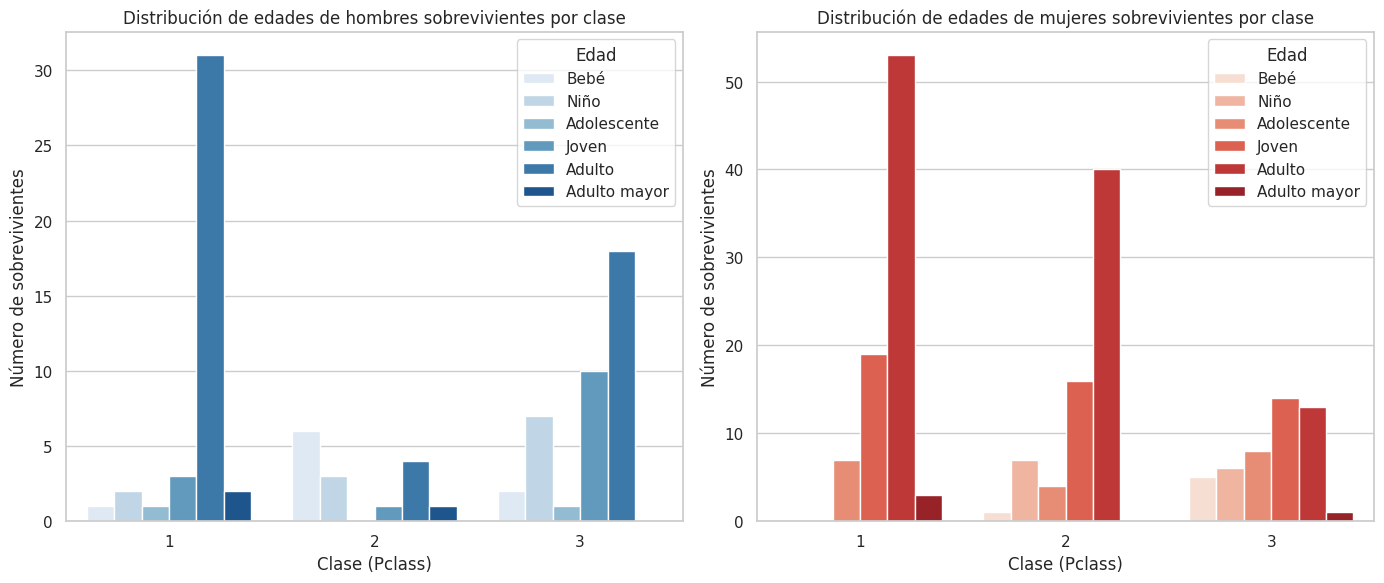

In [ ]:
# Filtrar sobrevivientes
sobrevivientes = df[df['Survived'] == 1].copy()

# Categorizar edades
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
sobrevivientes['Edad_categoria'] = pd.cut(sobrevivientes['Age'], bins=bins, labels=labels, right=True)

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))

# Gráfico para hombres
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', hue='Edad_categoria', data=sobrevivientes[sobrevivientes['Sex']=='male'], palette="Blues")
plt.title("Distribución de edades de hombres sobrevivientes por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Número de sobrevivientes")
plt.legend(title="Edad")

# Gráfico para mujeres
plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', hue='Edad_categoria', data=sobrevivientes[sobrevivientes['Sex']=='female'], palette="Reds")
plt.title("Distribución de edades de mujeres sobrevivientes por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Número de sobrevivientes")
plt.legend(title="Edad")

plt.tight_layout()

/tmp/ipython-input-4212327428.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Count')
/tmp/ipython-input-4212327428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")


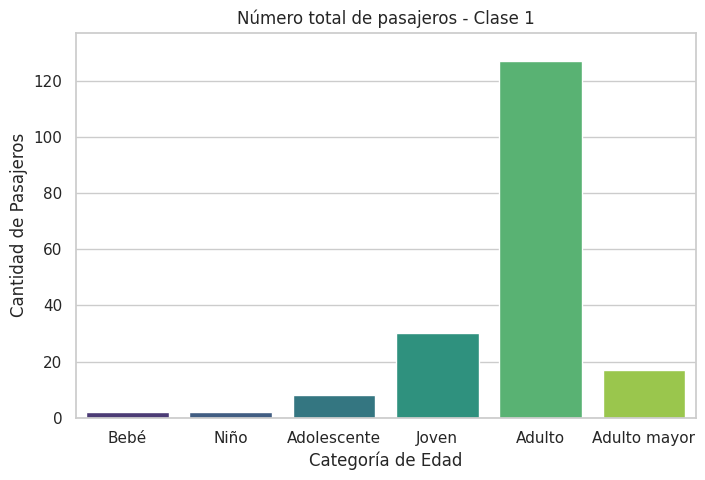

/tmp/ipython-input-4212327428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")


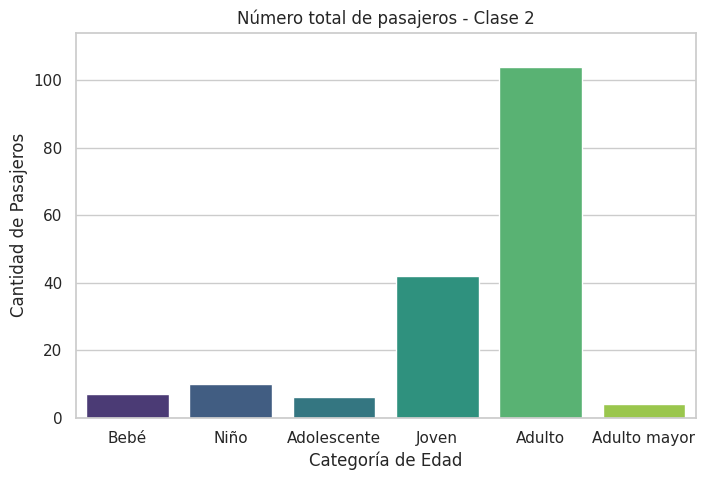

/tmp/ipython-input-4212327428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")


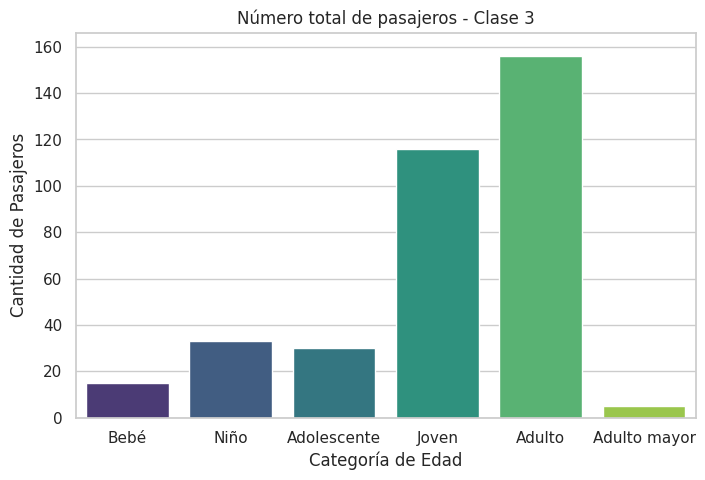

In [ ]:
# Categorizar edades
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df['Edad_categoria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Contar pasajeros por clase y categoría de edad
conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Count')

# Configuración de seaborn
sns.set(style="whitegrid")

# Generar gráficas separadas por clase
for clase in sorted(conteo_total['Pclass'].unique()):
    tabla_clase = conteo_total[conteo_total['Pclass']==clase]

    plt.figure(figsize=(8,5))
    sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")

    plt.title(f"Número total de pasajeros - Clase {clase}")
    plt.xlabel("Categoría de Edad")
    plt.ylabel("Cantidad de Pasajeros")
    plt.ylim(0, tabla_clase['Count'].max() + 10)

    plt.show()


/tmp/ipython-input-535295341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


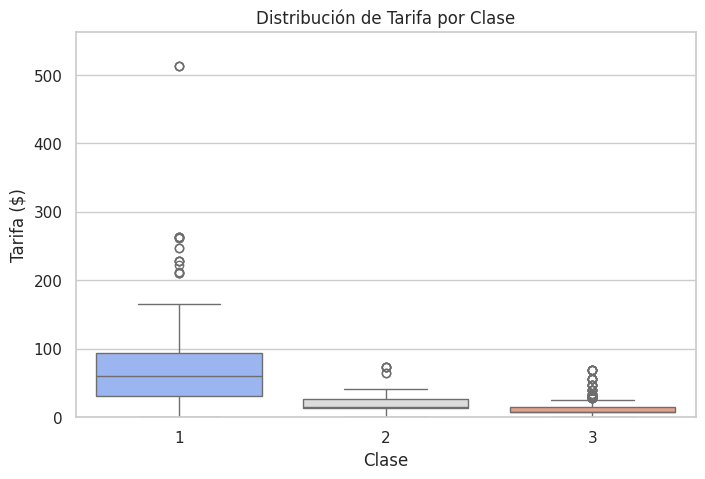

In [ ]:
#Tomar la columna de clase como eje X y tarifa en eje Y
plt.figure(figsize=(8,5))
ax = sns.boxplot(
    x='Pclass',
    y='Fare',
    data=data,
    palette='coolwarm'
)

plt.title('Distribución de Tarifa por Clase')
plt.xlabel('Clase')
plt.ylabel('Tarifa ($)')
plt.ylim(0, data['Fare'].max() + 50)  # Ajusta límite superior
plt.show()

/tmp/ipython-input-1781673748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_embarked.index, y=porcentaje_embarked.values, palette='Pastel1')


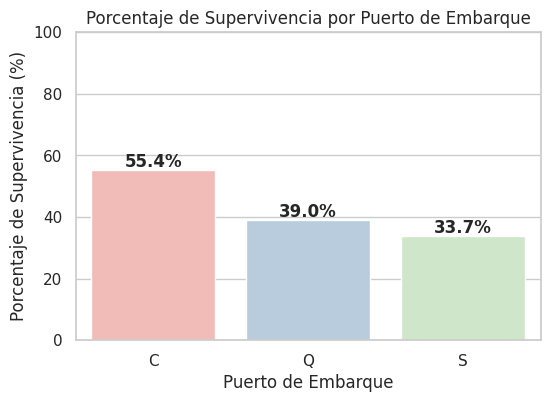

In [ ]:
# Excluir valores nulos en Embarked
embarked_data = data[data['Embarked'].notna()]

# Calcular porcentaje de supervivencia por Embarked
porcentaje_embarked = (embarked_data.groupby('Embarked')['Survived'].mean() * 100).sort_index()

# Crear gráfica
plt.figure(figsize=(6,4))
ax = sns.barplot(x=porcentaje_embarked.index, y=porcentaje_embarked.values, palette='Pastel1')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_embarked.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()

/tmp/ipython-input-2377229003.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_familia.index, y=porcentaje_familia.values, palette='coolwarm')


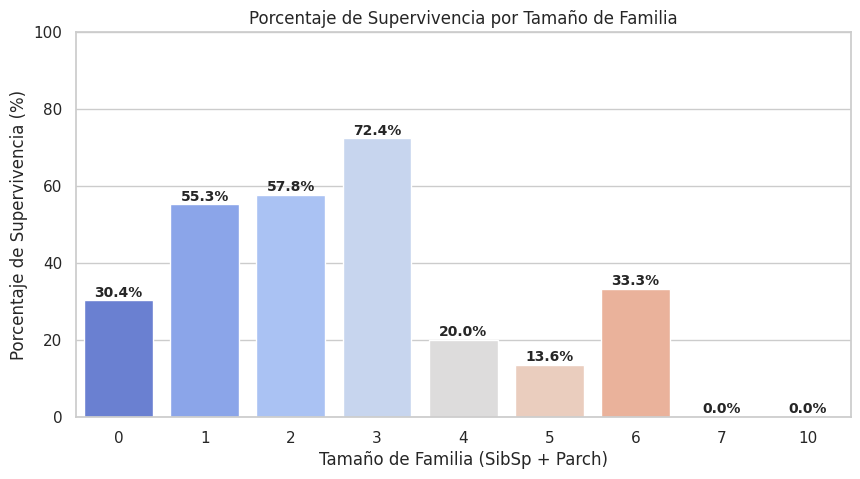

In [ ]:

# Crear columna de tamaño de familia
data['TamañoFamilia'] = data['SibSp'] + data['Parch']

# Calcular porcentaje de supervivencia por tamaño de familia
porcentaje_familia = (data.groupby('TamañoFamilia')['Survived'].mean() * 100).sort_index()

# Crear gráfica
plt.figure(figsize=(10,5))
ax = sns.barplot(x=porcentaje_familia.index, y=porcentaje_familia.values, palette='coolwarm')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_familia.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Tamaño de Familia')
plt.xlabel('Tamaño de Familia (SibSp + Parch)')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()

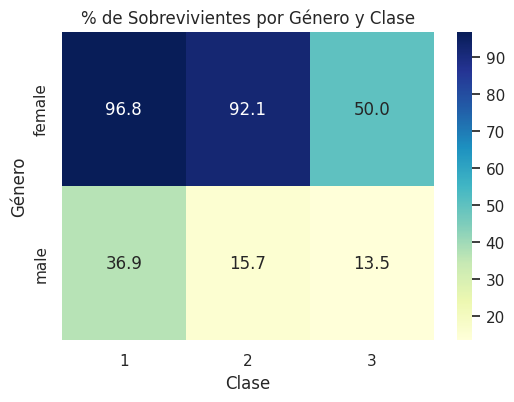

In [ ]:

# Calcular porcentaje de sobrevivientes por género y clase
survival_pct = data.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

# Pivotar para tener clases como columnas y géneros como filas
heatmap_data = survival_pct.pivot(index='Sex', columns='Pclass', values='Survived') * 100

# Crear heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('% de Sobrevivientes por Género y Clase')
plt.ylabel('Género')
plt.xlabel('Clase')
plt.show()

/tmp/ipython-input-1754123054.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mosaic_data = df_age.groupby(['AgeGroup', 'Survived']).size()


<Figure size 1000x600 with 0 Axes>

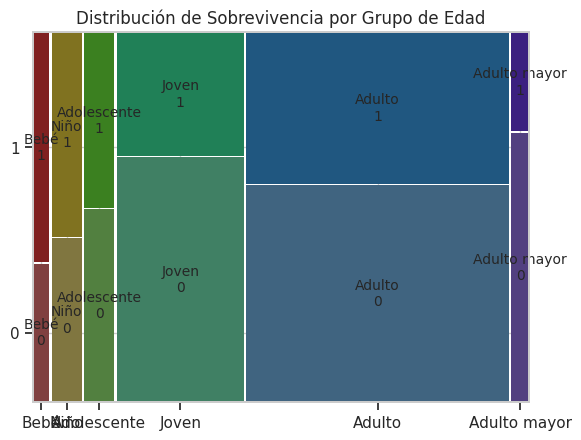

In [ ]:

# Definir grupos de edad
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']

# Crear columna de grupos de edad
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

# Eliminar filas con edad nula
df_age = data.dropna(subset=['AgeGroup'])

# Crear conteo por grupo de edad y sobrevivencia
mosaic_data = df_age.groupby(['AgeGroup', 'Survived']).size()
mosaic_dict = {(age, surv): count for (age, surv), count in mosaic_data.items()}

# Graficar mosaico
plt.figure(figsize=(10, 6))
mosaic(mosaic_dict, title='Distribución de Sobrevivencia por Grupo de Edad')
plt.show()

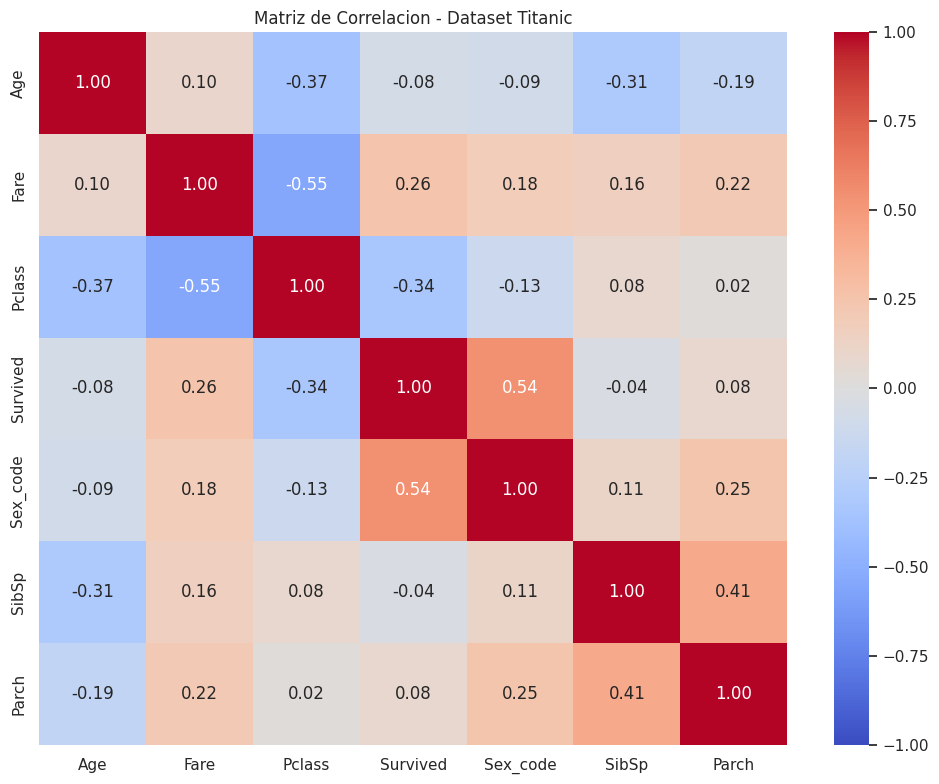


Matriz de correlacion:
            Age  Fare  Pclass  Survived  Sex_code  SibSp  Parch
Age       1.00  0.10   -0.37     -0.08     -0.09  -0.31  -0.19
Fare      0.10  1.00   -0.55      0.26      0.18   0.16   0.22
Pclass   -0.37 -0.55    1.00     -0.34     -0.13   0.08   0.02
Survived -0.08  0.26   -0.34      1.00      0.54  -0.04   0.08
Sex_code -0.09  0.18   -0.13      0.54      1.00   0.11   0.25
SibSp    -0.31  0.16    0.08     -0.04      0.11   1.00   0.41
Parch    -0.19  0.22    0.02      0.08      0.25   0.41   1.00


In [ ]:

numerical_columns = ['Age', 'Fare', 'Pclass', 'Survived', 'Sex_code',
                    'SibSp', 'Parch']

# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Matriz de Correlacion - Dataset Titanic')
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\nMatriz de correlacion:\n", correlation_matrix.round(2))

/tmp/ipython-input-28374714.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


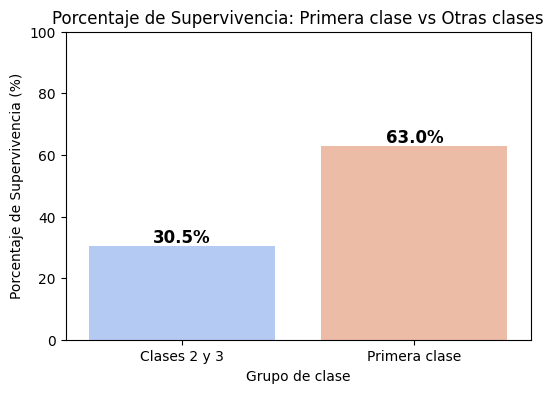

In [ ]:

# Crear una nueva variable que agrupe clases
data['ClaseAgrupada'] = data['Pclass'].apply(lambda x: 'Primera clase' if x == 1 else 'Clases 2 y 3')

# Calcular porcentaje de supervivencia
porcentaje_clase_agrupada = (data.groupby('ClaseAgrupada')['Survived'].mean() * 100)

# Crear gráfica
plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=porcentaje_clase_agrupada.index,
    y=porcentaje_clase_agrupada.values,
    palette='coolwarm'
)

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_clase_agrupada.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia: Primera clase vs Otras clases')
plt.xlabel('Grupo de clase')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()

/tmp/ipython-input-114821860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_sibsp.index, y=porcentaje_sibsp.values, palette='magma')


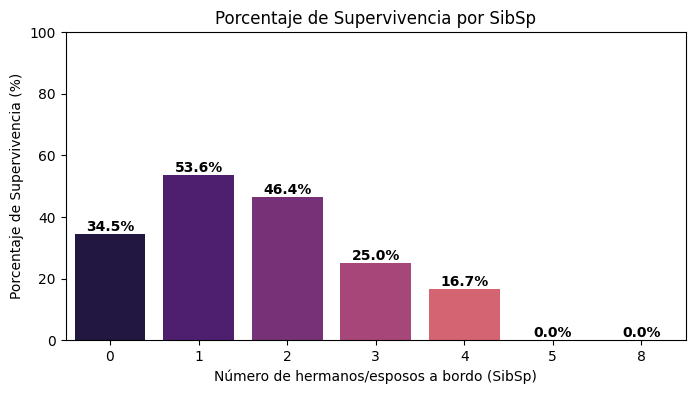

In [ ]:

# Calcular porcentaje de supervivencia por SibSp
porcentaje_sibsp = (data.groupby('SibSp')['Survived'].mean() * 100).sort_index()

# Crear gráfica
plt.figure(figsize=(8,4))
ax = sns.barplot(x=porcentaje_sibsp.index, y=porcentaje_sibsp.values, palette='magma')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_sibsp.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por SibSp')
plt.xlabel('Número de hermanos/esposos a bordo (SibSp)')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()

/tmp/ipython-input-2202811669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_parch.index, y=porcentaje_parch.values, palette='coolwarm')


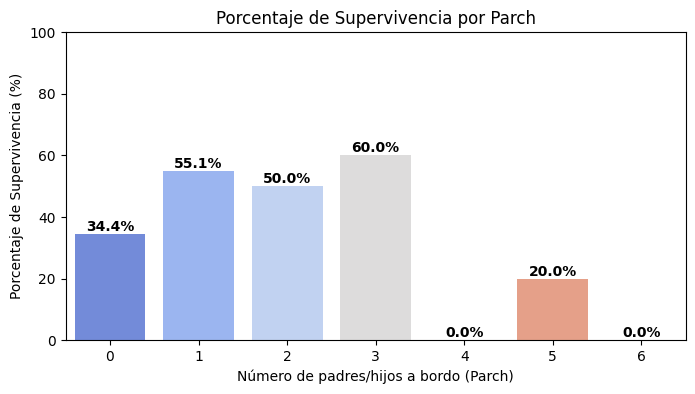

In [ ]:

# Calcular porcentaje de supervivencia por Parch
porcentaje_parch = (data.groupby('Parch')['Survived'].mean() * 100).sort_index()

# Crear gráfica
plt.figure(figsize=(8,4))
ax = sns.barplot(x=porcentaje_parch.index, y=porcentaje_parch.values, palette='coolwarm')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_parch.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Parch')
plt.xlabel('Número de padres/hijos a bordo (Parch)')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()

/tmp/ipython-input-2869696685.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_familia.index, y=porcentaje_familia.values, palette='Set2')


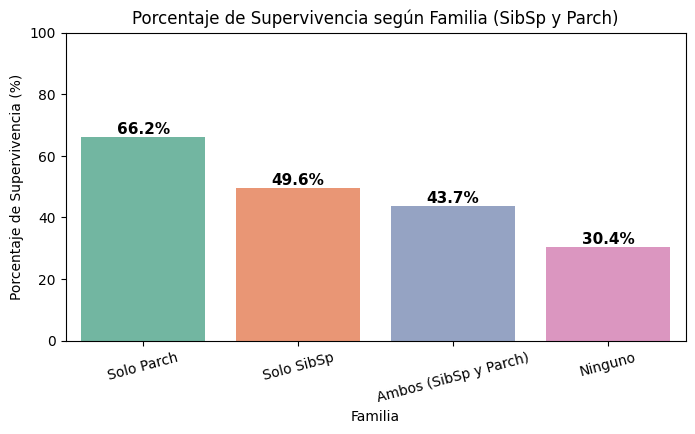

In [ ]:
# Crear columna categórica según combinación de SibSp y Parch
def categoria_familia(row):
    if row['SibSp'] > 0 and row['Parch'] > 0:
        return 'Ambos (SibSp y Parch)'
    elif row['SibSp'] > 0:
        return 'Solo SibSp'
    elif row['Parch'] > 0:
        return 'Solo Parch'
    else:
        return 'Ninguno'

data['Familia'] = data.apply(categoria_familia, axis=1)

# Calcular porcentaje de supervivencia por categoría
porcentaje_familia = (data.groupby('Familia')['Survived'].mean() * 100).sort_values(ascending=False)

# Crear gráfica
plt.figure(figsize=(8,4))
ax = sns.barplot(x=porcentaje_familia.index, y=porcentaje_familia.values, palette='Set2')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_familia.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia según Familia (SibSp y Parch)')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)
plt.xticks(rotation=15)

plt.show()

## Análisis de Valores Faltantes

<Figure size 300x150 with 0 Axes>

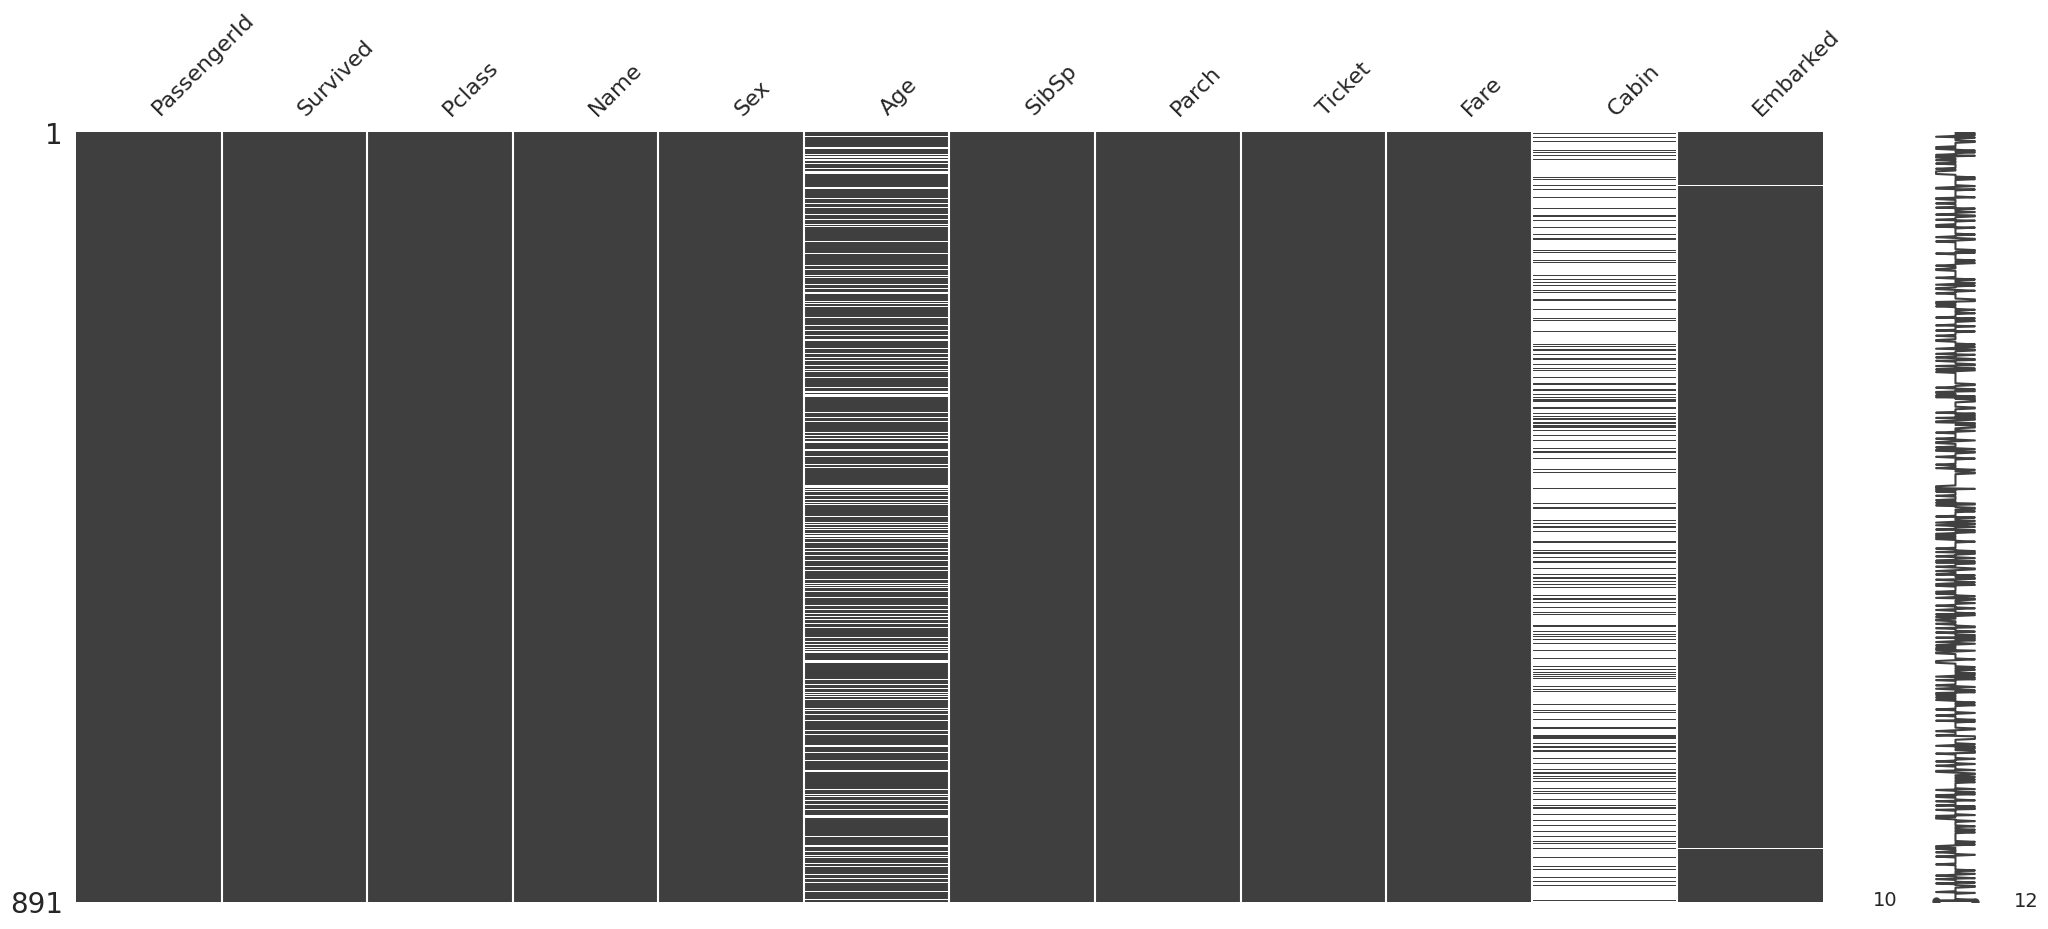

In [ ]:
# Matriz de valores faltantes (tamaño reducido)
plt.figure(figsize=(3, 1.5), dpi=100)
msno.matrix(df)
plt.show()

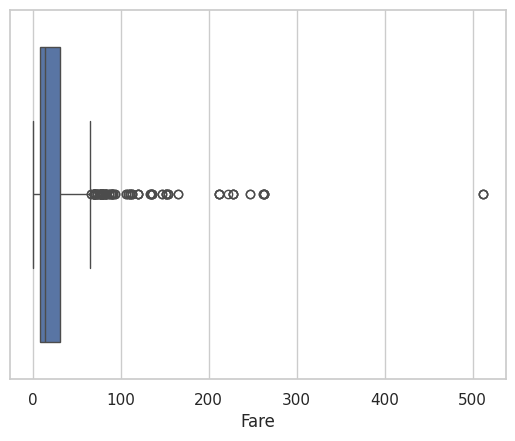

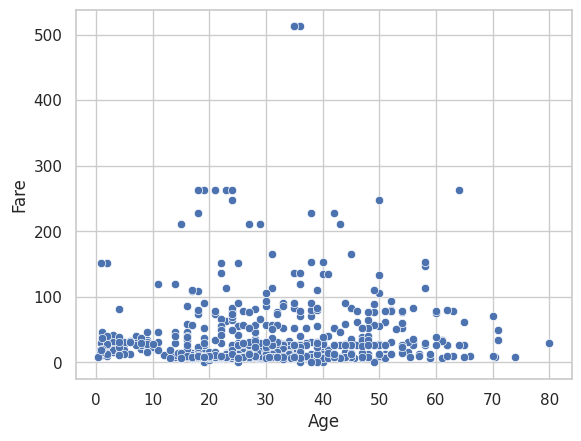

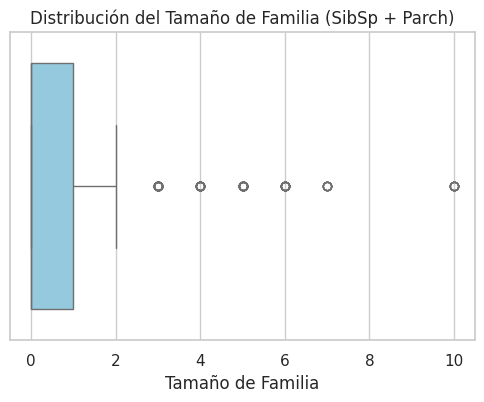

In [ ]:
# Boxplot para ver valores extremos de una variable numérica
sns.boxplot(x=data['Fare'])
plt.show()

# Scatter para ver dos variables y detectar puntos fuera de lo común
sns.scatterplot(x=data['Age'], y=data['Fare'])
plt.show()

# Crear nueva columna con tamaño de familia
data['FamilySize'] = data['SibSp'] + data['Parch']

# Graficar boxplot del tamaño de familia
plt.figure(figsize=(6,4))
sns.boxplot(x=data['FamilySize'], color="skyblue")
plt.title('Distribución del Tamaño de Familia (SibSp + Parch)')
plt.xlabel('Tamaño de Familia')
plt.show()

/tmp/ipython-input-1855421502.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Pclass', y='Cabin_missing', data=faltantes_clase, palette='viridis')


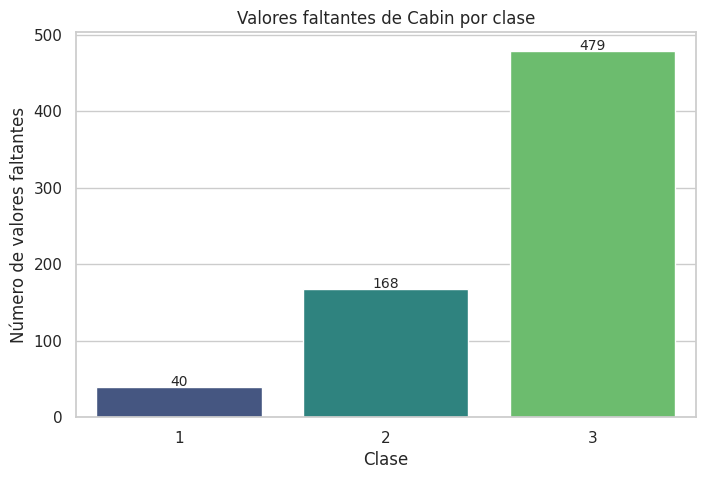

/tmp/ipython-input-1855421502.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Sex', y='Cabin_missing', data=faltantes_sexo, palette='Set2')


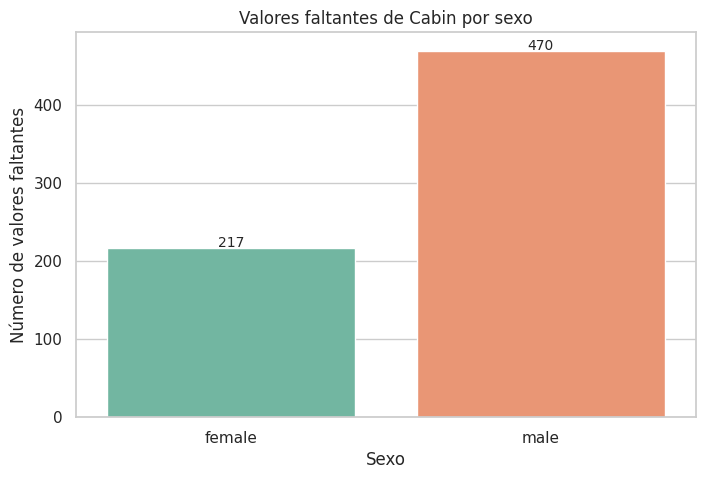

In [ ]:
# Crear columna que indique si Cabin está faltante
df['Cabin_missing'] = df['Cabin'].isnull()

sns.set(style="whitegrid")

# 1️⃣ Valores faltantes de Cabin por clase
faltantes_clase = df.groupby('Pclass')['Cabin_missing'].sum().reset_index()

plt.figure(figsize=(8,5))
ax1 = sns.barplot(x='Pclass', y='Cabin_missing', data=faltantes_clase, palette='viridis')
plt.title("Valores faltantes de Cabin por clase")
plt.xlabel("Clase")
plt.ylabel("Número de valores faltantes")

# Mostrar número exacto sobre cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}', ha='center', fontsize=10)

plt.show()

# 2️⃣ Valores faltantes de Cabin por sexo
faltantes_sexo = df.groupby('Sex')['Cabin_missing'].sum().reset_index()

plt.figure(figsize=(8,5))
ax2 = sns.barplot(x='Sex', y='Cabin_missing', data=faltantes_sexo, palette='Set2')
plt.title("Valores faltantes de Cabin por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de valores faltantes")

# Mostrar número exacto sobre cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}', ha='center', fontsize=10)

plt.show()


/tmp/ipython-input-2076420192.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Embarked', y='Age_missing', data=faltantes_age, palette='Set2')


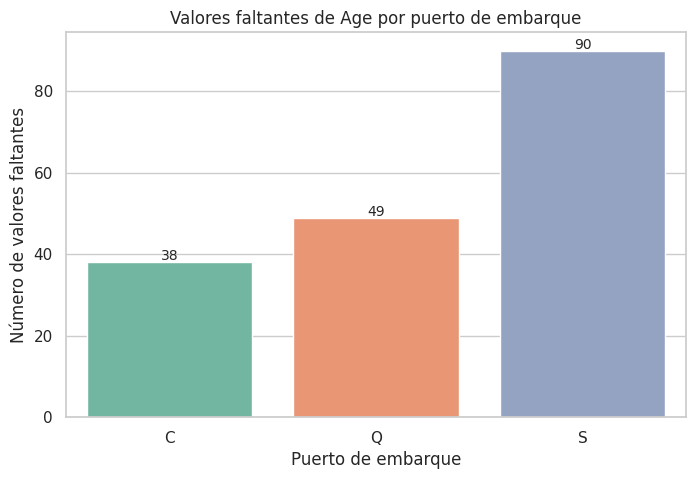

/tmp/ipython-input-2076420192.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Embarked', y='Cabin_missing', data=faltantes_cabin, palette='viridis')


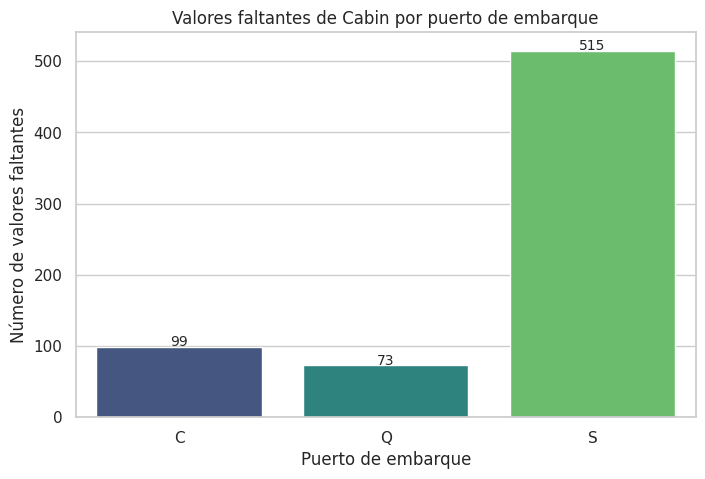

In [ ]:
# Crear columnas que indiquen si faltan Age o Cabin
df['Age_missing'] = df['Age'].isnull()
df['Cabin_missing'] = df['Cabin'].isnull()

sns.set(style="whitegrid")

# 1️⃣ Valores faltantes de Age por puerto de embarque
faltantes_age = df.groupby('Embarked')['Age_missing'].sum().reset_index()

plt.figure(figsize=(8,5))
ax1 = sns.barplot(x='Embarked', y='Age_missing', data=faltantes_age, palette='Set2')
plt.title("Valores faltantes de Age por puerto de embarque")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de valores faltantes")

# Mostrar número exacto sobre cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.5, f'{int(height)}', ha='center', fontsize=10)

plt.show()

# 2️⃣ Valores faltantes de Cabin por puerto de embarque
faltantes_cabin = df.groupby('Embarked')['Cabin_missing'].sum().reset_index()

plt.figure(figsize=(8,5))
ax2 = sns.barplot(x='Embarked', y='Cabin_missing', data=faltantes_cabin, palette='viridis')
plt.title("Valores faltantes de Cabin por puerto de embarque")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de valores faltantes")

# Mostrar número exacto sobre cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.5, f'{int(height)}', ha='center', fontsize=10)

plt.show()

In [ ]:
# Definir rangos de tarifa
bins = [0, 10, 50, 450, df['Fare'].max()]
labels = ['Muy bajo (0-10)', 'Bajo (10-50)', 'Medio (50-100)', 'Alto (100+)']

data['FareGroup'] = pd.cut(data['Fare'], bins=bins, labels=labels, right=False)

# Calcular % de supervivencia por rango
survival_pct_fare = data.groupby('FareGroup')['Survived'].mean() * 100

print(survival_pct_fare)

FareGroup
Muy bajo (0-10)    19.940476
Bajo (10-50)       42.131980
Medio (50-100)     67.088608
Alto (100+)              NaN
Name: Survived, dtype: float64


/tmp/ipython-input-822960000.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_pct_fare = data.groupby('FareGroup')['Survived'].mean() * 100


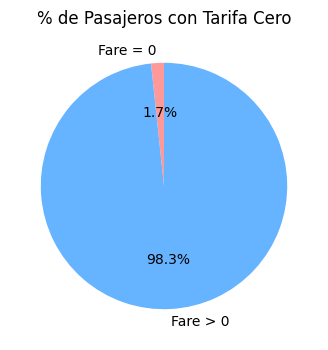

In [ ]:

# Calcular % de los que pagaron 0
fare_zero_pct = (data['Fare'] == 0).mean() * 100
fare_nonzero_pct = 100 - fare_zero_pct

# Preparar datos para gráfica
labels = ['Fare = 0', 'Fare > 0']
values = [fare_zero_pct, fare_nonzero_pct]

# Graficar
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('% de Pasajeros con Tarifa Cero')
plt.show()